In [3]:
from gaia_download import gaia_cone_search_5d
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.coordinates import ICRS, SkyCoord
from simbad_download import resolve_name

In [4]:
RA: float = 11.7980
DEC: float = 85.2440

# Download 5D data for NGC 188

NGC 188 coordinates (ICRS):

$\alpha$ = 11.7980$^\circ$

$\delta$ = +85.2440$^\circ$

It is located by est. 1.17 kpc and has a radius of ~4 pc.

Therefore, I am going to fetch all the objects with parallaxes within 0.75 and 1.

In [5]:
ra, dec, par, pmra, pmdec, radvel = resolve_name('NGC 188')
sources: pd.DataFrame = gaia_cone_search_5d(ra, dec, par, pmra, pmdec, radvel, 2.,
                                           min_parallax=0.25,
                                           max_parallax=0.75)

Executing cone search for ra=+11.80 and dec=+85.24 with radius of 2.0...
Executing query:

        SELECT *
        FROM gaiadr3.gaia_source 
        WHERE 1 = CONTAINS( 
                POINT('ICRS', ra, dec), 
                CIRCLE('ICRS',
                    COORD1(EPOCH_PROP_POS(11.797999999999998, 85.244, 0.5053, -2.3087, -0.9565, -41.82, 2000, 2016.0)),
                    COORD2(EPOCH_PROP_POS(11.797999999999998, 85.244, 0.5053, -2.3087, -0.9565, -41.82, 2000, 2016.0)),
                2.0)) 
        AND parallax > 0.25 AND parallax < 0.75 
    
INFO: Query finished. [astroquery.utils.tap.core]
Query finished!


In [6]:
sources.to_csv('./NGC 188.csv', index=None)

In [7]:
len(sources)

49649

In [8]:
sources.to_csv('./data/ngc_188/2_deg.csv', index=None)

In [9]:
sky_coords: list[SkyCoord] = SkyCoord(ra=sources.ra.values, dec=sources.dec.values,
                                      frame=ICRS, unit=(u.deg, u.deg))

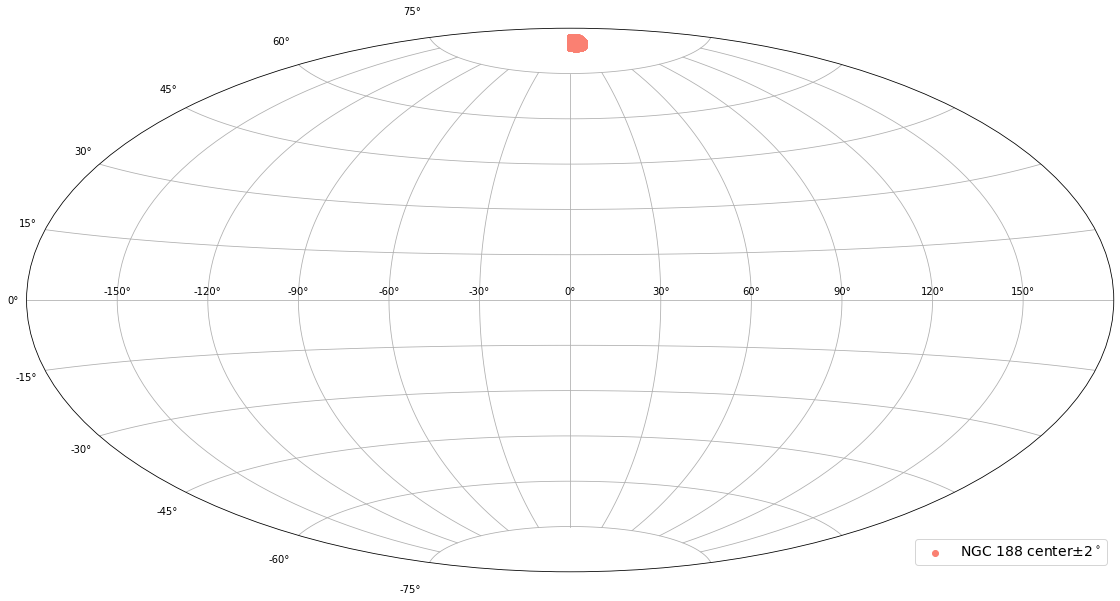

In [10]:
plt.figure(figsize=(20, 10))
plt.subplot(111, projection="aitoff")
plt.scatter(sky_coords.ra.radian, sky_coords.dec.radian, color='salmon', label=r'NGC 188 center$\pm 2^\circ$')
plt.grid()
plt.legend(loc='lower right', fontsize=14)